# Abstract example on clustering

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [4]:
np.random.seed = 42

In [8]:
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, cluster_std=1.5)

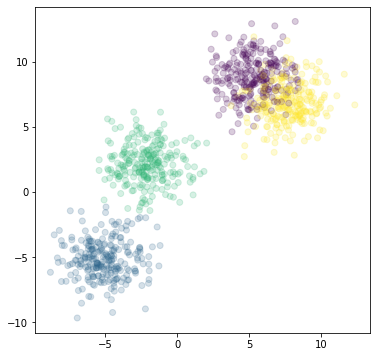

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:,0], X[:,1], alpha=0.2, c=y)
plt.show()

In [54]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [55]:
algorithms = {
    'Kmeans': KMeans(n_clusters=4),
    'AffinityPropagation': AffinityPropagation(random_state=None, max_iter=500, convergence_iter=35),
    'Completelinkage': AgglomerativeClustering(n_clusters=4, linkage='complete'),
    'Singlelinkage': AgglomerativeClustering(n_clusters=4, linkage='single'),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}
results = {}

In [56]:
for alg, imp in algorithms.items():
    results[alg] = imp.fit_predict(X)

/Users/alfio/Applications/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:247: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


In [57]:
y[:10]

array([1, 0, 3, 0, 2, 1, 2, 1, 2, 1])

In [58]:
results['Kmeans'][:10]

array([1, 0, 3, 3, 2, 1, 2, 1, 2, 1], dtype=int32)

In [59]:
from sklearn.metrics import adjusted_rand_score

In [60]:
for alg, y_pred in results.items():
    print(alg, adjusted_rand_score(y, y_pred))

Kmeans 0.8324858614346298
AffinityPropagation 0.0
Completelinkage 0.7783094756909463
Singlelinkage 0.4982501215610236
DBSCAN 0.513094294061407


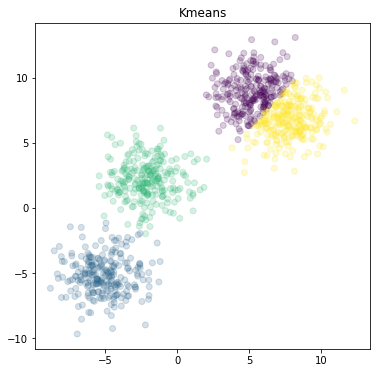

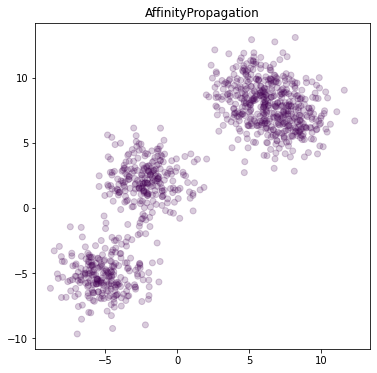

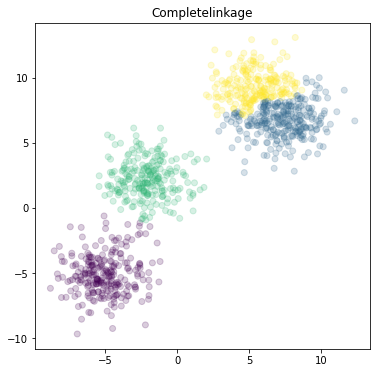

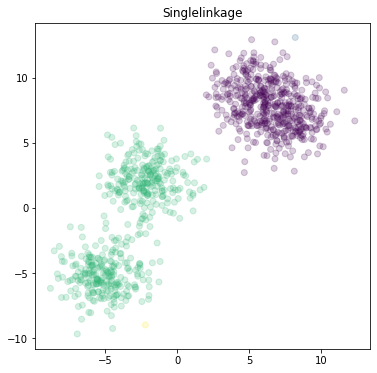

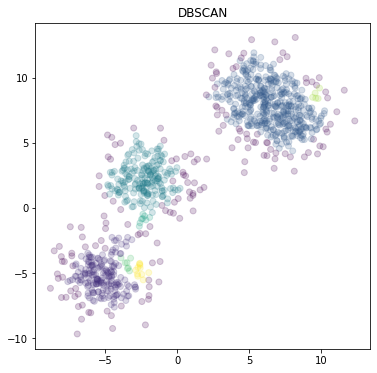

In [61]:
for alg, y_pred in results.items():
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(alg)
    ax.scatter(X[:,0], X[:,1], alpha=0.2, c=y_pred)
    plt.show()